# **`Project-2`**
#### **`Regression Project:`** **Use all the regression algorithms that you have learned throughout the course to predict the price. Use data cleaning techniques & other data analysis techniques to make the dataset more effective.**

## **`#1 Importing Necessary Libraries`**

In [1]:
import gensim as gs
import gradio as gr
import joblib as jb
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
import sklearn.cluster as cluster
import string as st
import warnings
from gensim.models import Word2Vec
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from IPython.display import Image
from kneed import KneeLocator
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize as stt
from nltk.tokenize import word_tokenize as wtt
from pandas.core.dtypes.common import is_numeric_dtype as is_num
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification as mc
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import f_classif as fcf
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")

## **`#2 Loading The Dataset`**

In [2]:
df = pd.read_excel('global_laptop_selling_data.xlsx')

## **`#3.1 Exploratory Data Analysis (EDA)`**

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [6]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
df.corr(numeric_only = True)

,laptop_ID,Inches,Price_euros
laptop_ID,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


In [11]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

## **`#3.2 Dataset Visualization`**

### **`#3.2.1 Histplot`**

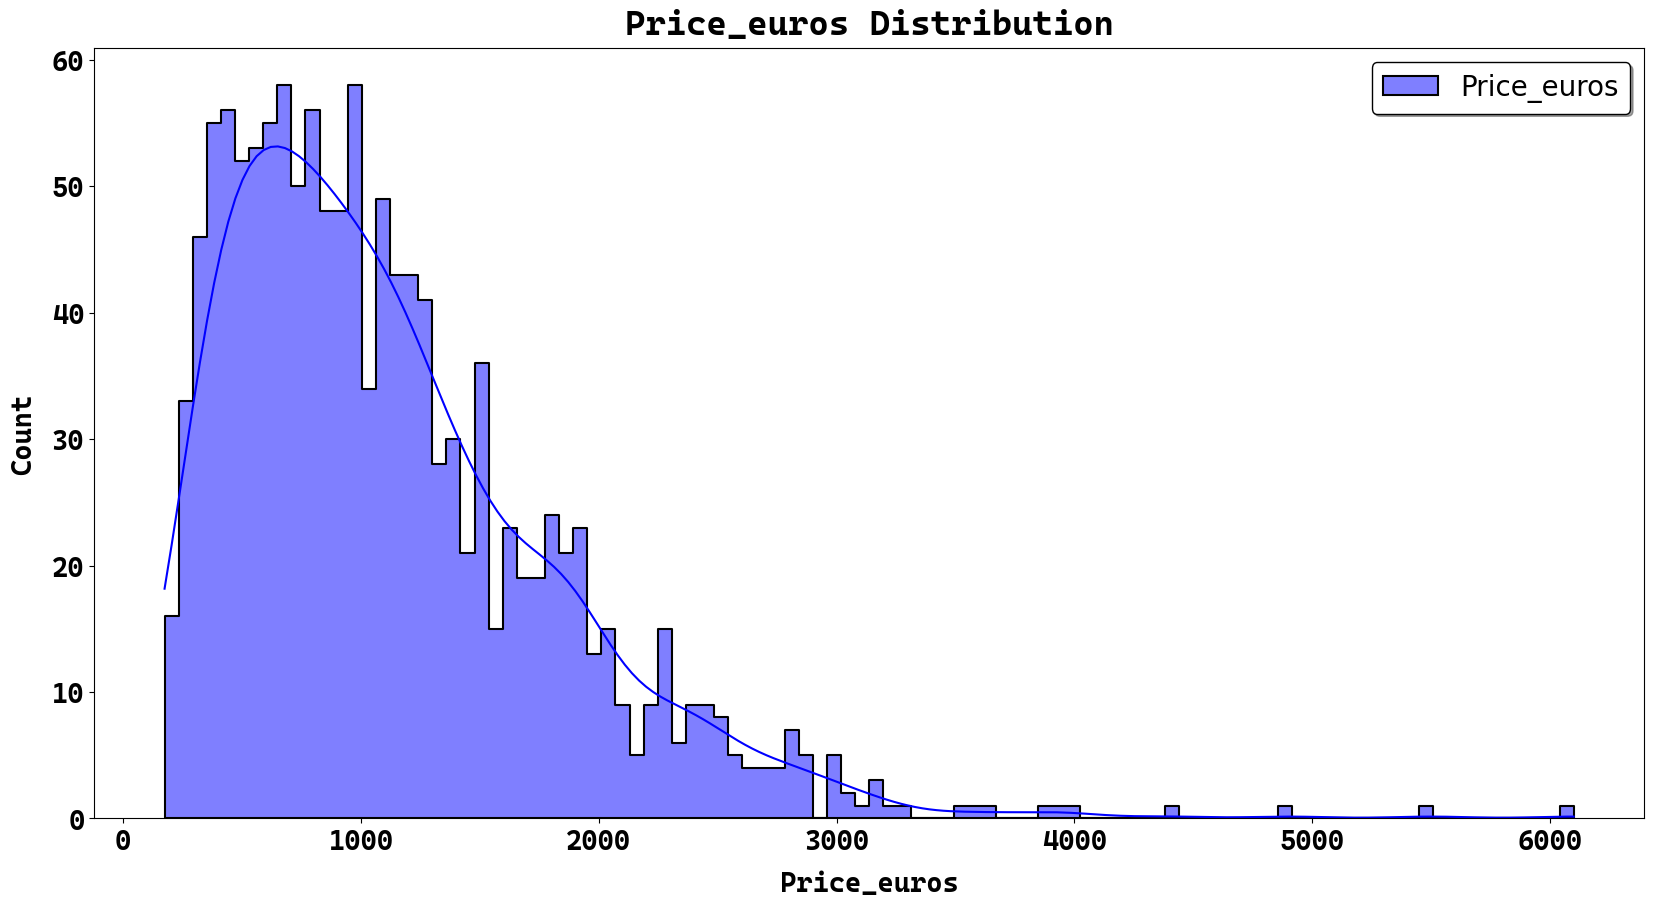

In [12]:
plt.figure(figsize = (20, 10))
sns.histplot(df['Price_euros'], kde = True, bins = 100, color = 'blue', edgecolor = 'black', linewidth = 1.5, alpha = 0.5, label = 'Price_euros', element = 'step', fill = True).set_title('Price_euros Distribution', fontsize = 25, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('Price_euros', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.ylabel('Count', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.xticks(fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.yticks(fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.legend(loc = 'upper right', fontsize = 20, markerscale = 1.5, frameon = True, edgecolor = 'black', facecolor = 'white', shadow = True, framealpha = 1.0, labelcolor = 'black')
plt.show()

### **`#3.2.2 Barplot`**

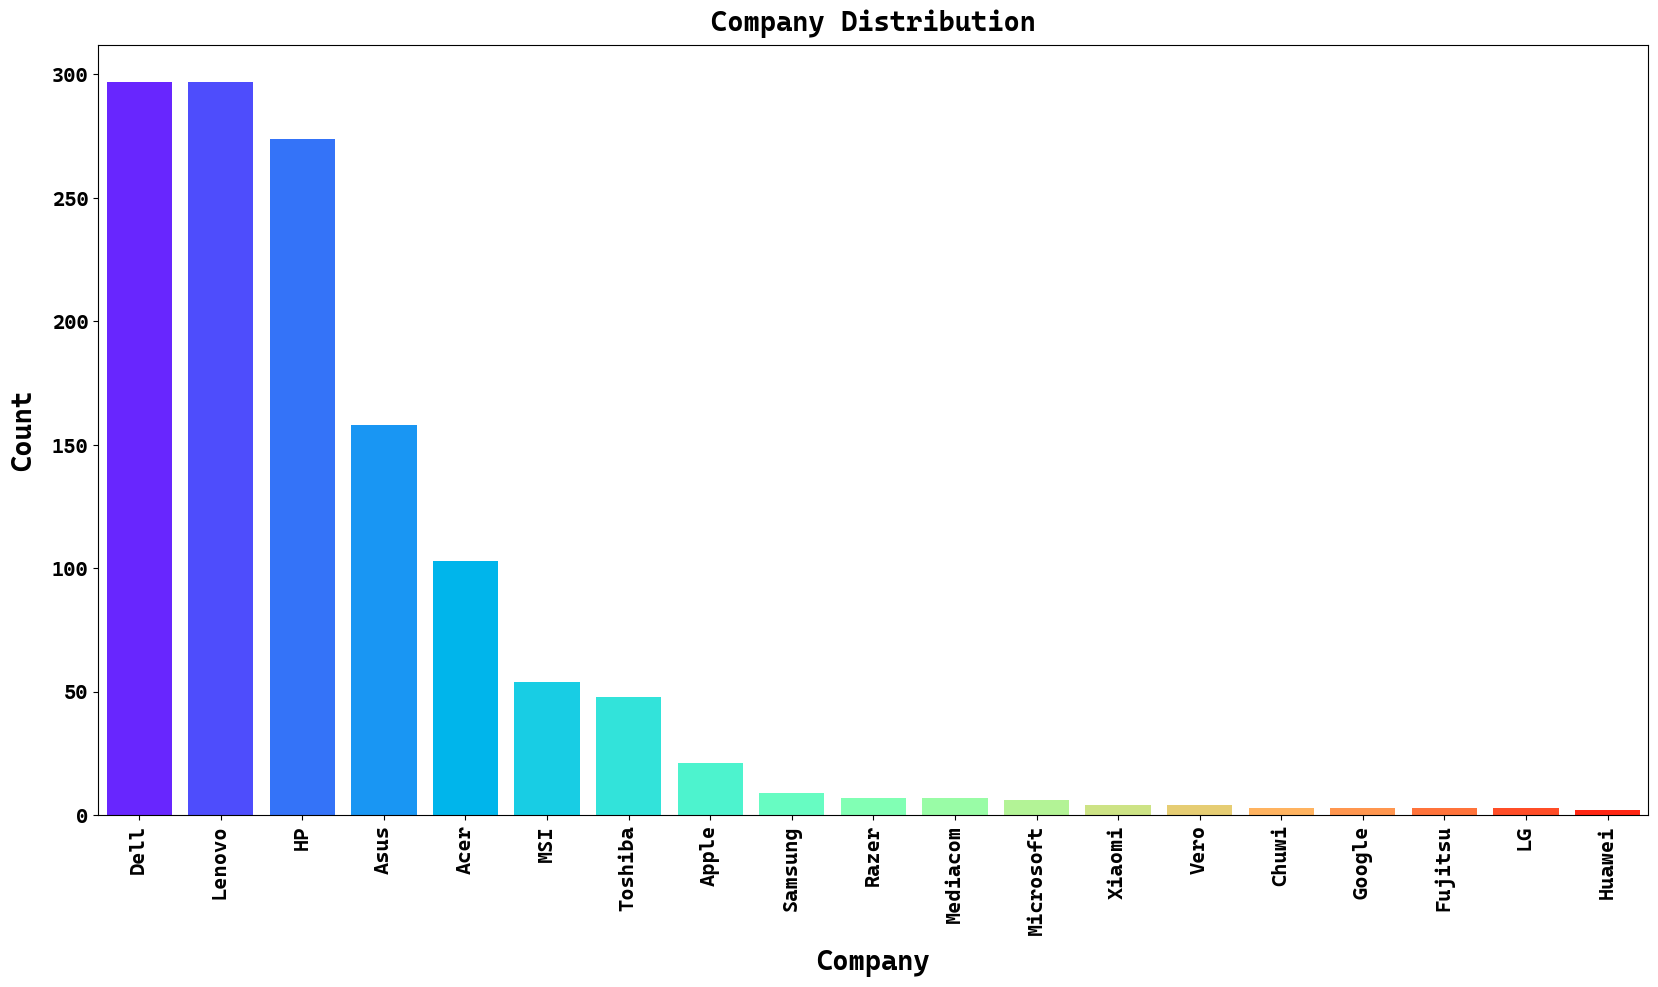

In [13]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df['Company'].value_counts().index, y = df['Company'].value_counts().values, data = df, palette = 'rainbow', saturation = 1.0, errcolor = 'black', errwidth = 2.0, capsize = 0.2).set_title('Company Distribution', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('Company', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.ylabel('Count', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.xticks(rotation = 90, fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.show()

### **`#3.2.3 Boxplot`**

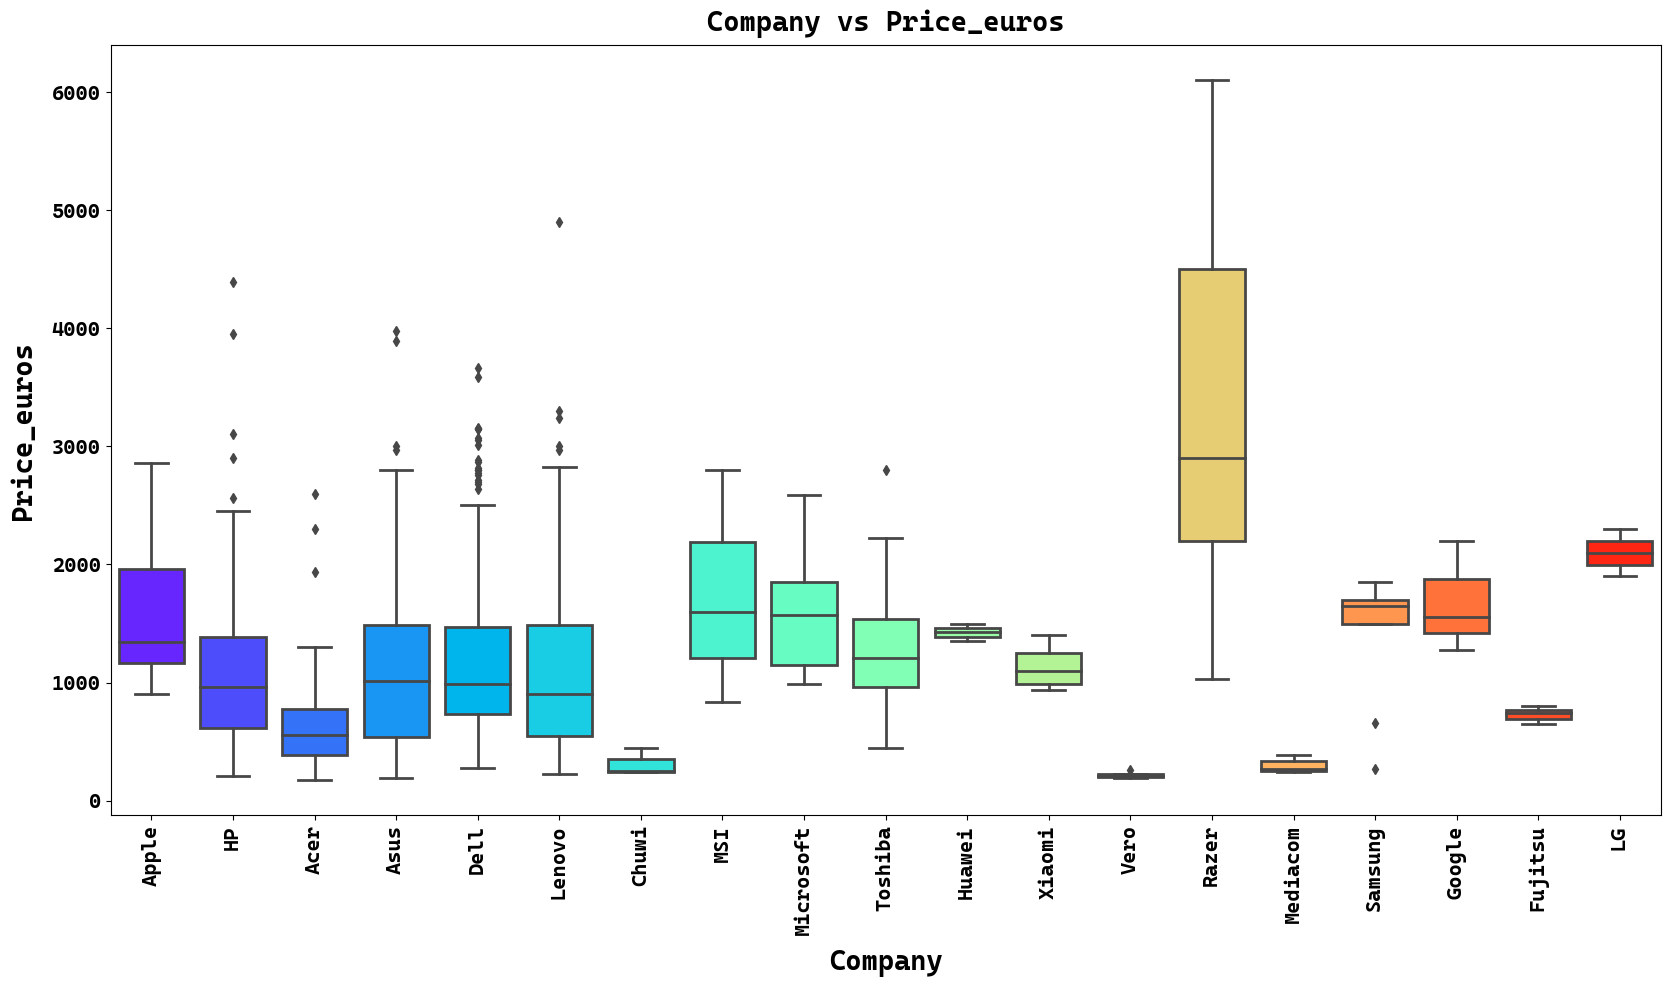

In [14]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = df['Company'], y = df['Price_euros'], data = df, palette = 'rainbow', saturation = 1.0, width = 0.8, fliersize = 5.0, linewidth = 2.0, whis = 1.5).set_title('Company vs Price_euros', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('Company', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.ylabel('Price_euros', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.xticks(rotation = 90, fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.show()

### **`#3.2.4 Scatterplot`**

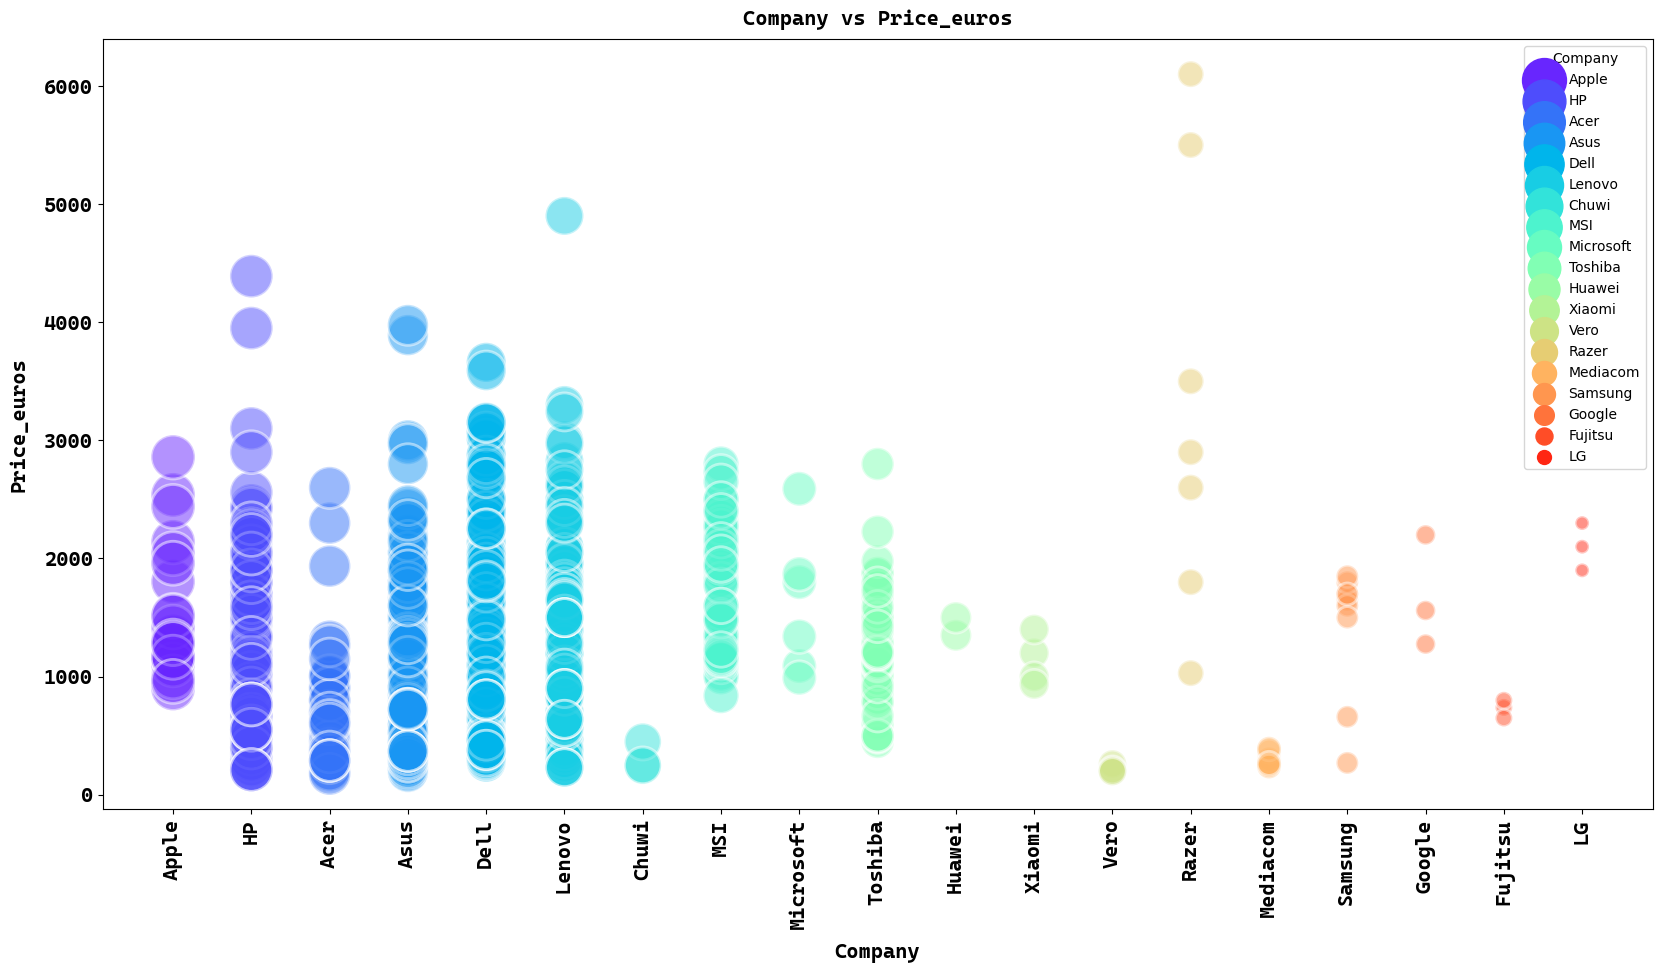

In [15]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = df['Company'], y = df['Price_euros'], data = df, palette = 'rainbow', hue = df['Company'], size = df['Company'], sizes = (100, 1000), alpha = 0.5).set_title('Company vs Price_euros', fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('Company', fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.ylabel('Price_euros', fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.xticks(rotation = 90, fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.show()

### **`#3.2.5 Heatmap`**

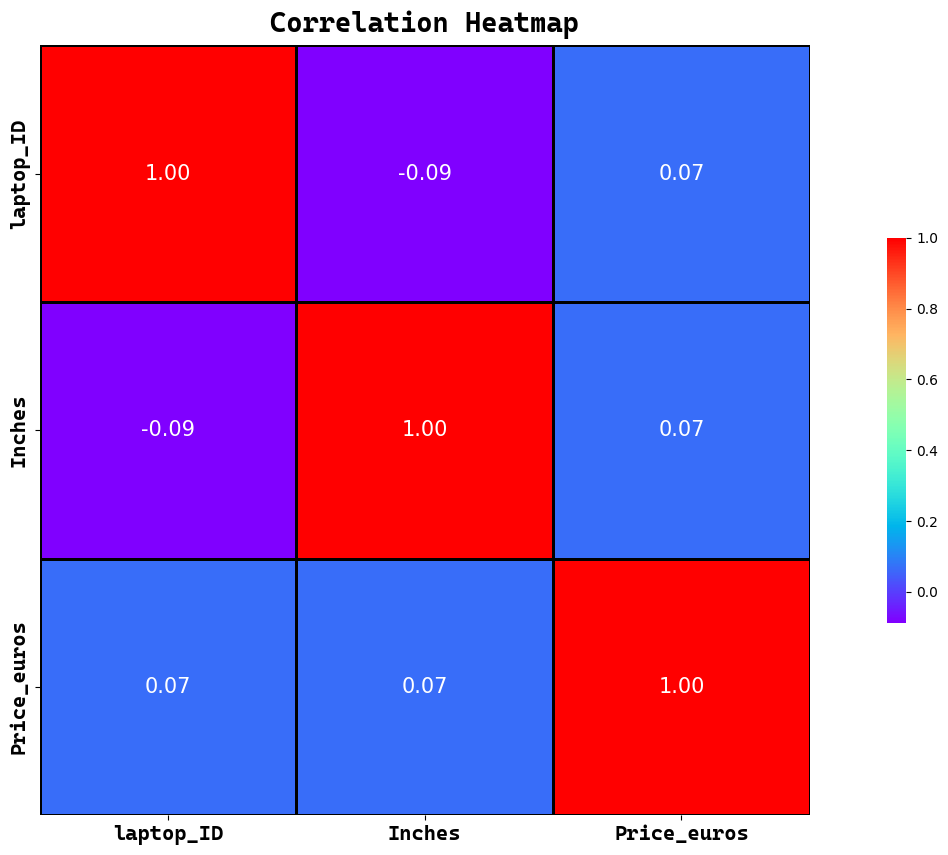

In [16]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'rainbow', fmt = '.2f', linewidths = 2.0, linecolor = 'black', square = True, annot_kws = {'size': 15}, cbar = True, cbar_kws = {'shrink': 0.5}).set_title('Correlation Heatmap', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.show()

## **`#4 Data Cleaning and Preprocessing`**

### **`#4.1 Handling Missing Values`**

In [17]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

*`[NO MISSING VALUES DETECTED]`*

### **`#4.2 Handling Duplicates`**

In [18]:
df.duplicated().sum()

0

*`[NO DUPLICATE VALUES DETECTED]`*

### **`#4.3 Feature Scaling`**

#### **`#4.3.1 Min-Max Scaling`**

In [19]:
mm = MinMaxScaler(feature_range = (0, 1))

In [20]:
df['Price_euros'] = mm.fit_transform(df[['Price_euros']])
df['Inches'] = mm.fit_transform(df[['Inches']])
df['laptop_ID'] = mm.fit_transform(df[['laptop_ID']])

In [21]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,0.000000,Apple,MacBook Pro,Ultrabook,0.385542,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,0.196741
1,0.000758,Apple,Macbook Air,Ultrabook,0.385542,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,0.122353
2,0.001516,HP,250 G6,Notebook,0.662651,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,0.067679
3,0.002274,Apple,MacBook Pro,Ultrabook,0.638554,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,0.398895
4,0.003033,Apple,MacBook Pro,Ultrabook,0.385542,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,0.275038


### **`#4.4 Handling Categorical Variables`**

#### **`#4.4.1 Label Encoding`**

In [22]:
le = LabelEncoder()

In [23]:
for col in df.columns:
    if is_num(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [24]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,0.000000,1,300,4,0.385542,23,65,8,4,56,8,38,0.196741
1,0.000758,1,301,4,0.385542,1,63,8,2,50,8,35,0.122353
2,0.001516,7,50,3,0.662651,8,74,8,16,52,4,74,0.067679
3,0.002274,1,300,4,0.638554,25,85,1,29,8,8,71,0.398895
4,0.003033,1,300,4,0.385542,23,67,8,16,57,8,38,0.275038


### **`#4.5 Removing Irrelevant or Redundant Features`**

In [25]:
df.drop(['laptop_ID'], axis = 1, inplace = True)

In [26]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,0.385542,23,65,8,4,56,8,38,0.196741
1,1,301,4,0.385542,1,63,8,2,50,8,35,0.122353
2,7,50,3,0.662651,8,74,8,16,52,4,74,0.067679
3,1,300,4,0.638554,25,85,1,29,8,8,71,0.398895
4,1,300,4,0.385542,23,67,8,16,57,8,38,0.275038


## **`#5 Split the dataset`**

In [27]:
x = df.drop(['Price_euros'], axis = 1)
y = df['Price_euros']

In [28]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3, random_state = 42)

## **`#6 Model Training and Evaluation`**

### **`#6.1 Linear Regression`**

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [31]:
lr_pred = lr.predict(xtest)
lr_pred

array([ 0.18973234,  0.17732542, -0.01928791,  0.20530792,  0.11270564,
        0.18359922,  0.11613081,  0.08550865,  0.20379013,  0.05196408,
        0.27312704,  0.06753604,  0.23189449,  0.01875286,  0.25935605,
        0.18726885,  0.21735118,  0.19024629,  0.18330905,  0.25518626,
        0.23664179,  0.17822795,  0.1369785 ,  0.13443349,  0.15507165,
        0.21027039,  0.16420072,  0.15557569,  0.13784181,  0.14821806,
        0.07427514,  0.19897307,  0.18818542,  0.11947393,  0.17844909,
        0.23130292,  0.15601193,  0.01751228,  0.17809825, -0.00934892,
        0.31982129,  0.1245491 ,  0.20664895,  0.2577461 ,  0.09146856,
        0.14966043,  0.28827728,  0.10125593,  0.13796026,  0.17553165,
        0.18042358, -0.00926522,  0.22621146,  0.12678339,  0.23329878,
        0.18847956,  0.10124612,  0.14378697,  0.16022434,  0.20530792,
        0.15960803,  0.24283845,  0.10571192,  0.19132631,  0.03354529,
        0.26386514, -0.02296651,  0.0670741 ,  0.14531248,  0.25

In [32]:
lr_mse = mse(ytest, lr_pred)
lr_mse

0.008894679285432

In [33]:
lr_mae = mae(ytest, lr_pred)
lr_mae

0.06507123139790764

In [34]:
lr_acc = lr.score(xtest, ytest)
lr_acc

0.4168720599326944

### **`#6.2 Decision Tree`**

In [35]:
dt = DecisionTreeRegressor()

In [36]:
dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [37]:
dt_pred = dt.predict(xtest)
dt_pred

array([0.21957806, 0.25586498, 0.06329114, 0.12236287, 0.15324895,
       0.22362869, 0.18413502, 0.05485232, 0.12236287, 0.01702954,
       0.29113924, 0.06329114, 0.29113924, 0.10666498, 0.20810127,
       0.24050633, 0.16455696, 0.14108017, 0.1156135 , 0.28270042,
       0.37552743, 0.09220591, 0.12986329, 0.01367089, 0.15563882,
       0.20183966, 0.05248945, 0.05248945, 0.25248945, 0.12843882,
       0.04810127, 0.27021097, 0.25586498, 0.16472574, 0.13485232,
       0.13113924, 0.09029536, 0.05316456, 0.16793249, 0.        ,
       0.20337553, 0.06329114, 0.13586498, 0.1443038 , 0.07696203,
       0.12843882, 0.18987342, 0.00590717, 0.1107173 , 0.21534177,
       0.2742616 , 0.0458903 , 0.1021097 , 0.15324895, 0.12067511,
       0.09367089, 0.00590717, 0.12986329, 0.1135865 , 0.12236287,
       0.2785654 , 0.13113924, 0.03291139, 0.06835443, 0.02042194,
       0.2742616 , 0.06664979, 0.12236287, 0.12067511, 0.57633755,
       0.57633755, 0.10548523, 0.05485232, 0.12067511, 0.01198

In [38]:
dt_mse = mse(ytest, dt_pred)
dt_mse

0.005422441128958691

In [39]:
dt_mae = mae(ytest, dt_pred)
dt_mae

0.042536186560479985

In [40]:
dt_acc = dt.score(xtest, ytest)
dt_acc

0.6445091695610985

### **`#6.3 Random Forest`**

In [41]:
rf = RandomForestRegressor()

In [42]:
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [43]:
rf_pred = rf.predict(xtest)
rf_pred

array([0.20922093, 0.23254248, 0.06147907, 0.13507068, 0.21357806,
       0.2312615 , 0.10586427, 0.06459745, 0.16851921, 0.02709465,
       0.28431183, 0.08929249, 0.25450825, 0.09811376, 0.27753703,
       0.20259794, 0.19159823, 0.15004847, 0.14023023, 0.31282515,
       0.32685976, 0.09291261, 0.17535892, 0.01910554, 0.15673312,
       0.1878559 , 0.08246851, 0.07944754, 0.24749602, 0.13817436,
       0.05055335, 0.25500039, 0.2649607 , 0.19102052, 0.13054326,
       0.11424624, 0.09468476, 0.05102893, 0.1831386 , 0.01337283,
       0.21875988, 0.07808965, 0.19008862, 0.2676332 , 0.07015597,
       0.1415521 , 0.25569509, 0.0096162 , 0.11810842, 0.22454236,
       0.26150714, 0.07950943, 0.13922344, 0.17673403, 0.14852635,
       0.19406248, 0.00958245, 0.14988012, 0.14253597, 0.13507068,
       0.22852518, 0.11972118, 0.04732307, 0.07959711, 0.0251643 ,
       0.28583222, 0.06590564, 0.13673774, 0.13070037, 0.45923095,
       0.48196194, 0.12809199, 0.06755484, 0.12367325, 0.02129

In [44]:
rf_mse = mse(ytest, rf_pred)
rf_mse

0.003047560454857956

In [45]:
rf_mae = mae(ytest, rf_pred)
rf_mae

0.032370350451257364

In [46]:
rf_acc = rf.score(xtest, ytest)
rf_acc

0.8002044151066219

### **`#6.4 KNN Regression`**

In [47]:
knn = KNeighborsRegressor()

In [48]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [49]:
knn_pred = knn.predict(xtest)
knn_pred

array([0.25103797, 0.20870886, 0.06801688, 0.14258228, 0.23091983,
       0.22805063, 0.1202535 , 0.05485232, 0.1935865 , 0.06092793,
       0.21994903, 0.09221671, 0.22204219, 0.10761181, 0.2861097 ,
       0.14994093, 0.20398312, 0.14884489, 0.12140084, 0.28945148,
       0.3440216 , 0.15191662, 0.13316456, 0.01556118, 0.16289857,
       0.15551055, 0.11472034, 0.12511527, 0.24459072, 0.13625215,
       0.05484017, 0.17495359, 0.22636287, 0.10720709, 0.09566245,
       0.09161148, 0.09724895, 0.05451477, 0.19453806, 0.02295359,
       0.27868354, 0.06325738, 0.12940624, 0.20324051, 0.06911122,
       0.13625215, 0.33525738, 0.01556118, 0.08006481, 0.24323713,
       0.25529114, 0.03911865, 0.18714194, 0.18757772, 0.0845573 ,
       0.17606751, 0.01556118, 0.14329114, 0.23268928, 0.14258228,
       0.2652935 , 0.09623595, 0.05896709, 0.09248945, 0.03131781,
       0.29262447, 0.060587  , 0.05451477, 0.10264979, 0.21300219,
       0.31642194, 0.13716996, 0.07686042, 0.15574684, 0.03567

In [50]:
knn_mse = mse(ytest, knn_pred)
knn_mse

0.0055274297240328115

In [51]:
knn_mae = mae(ytest, knn_pred)
knn_mae

0.0435684168042561

In [52]:
knn_acc = knn.score(xtest, ytest)
knn_acc

0.6376262026534099

## **`#7 Model Comparison and Selection`**

### **`#7.1 Model Comparison`**

In [53]:
pred_compare = pd.DataFrame({'Actual': ytest, 'Linear Regression': lr_pred, 'Decision Tree': dt_pred, 'Random Forest': rf_pred, 'KNN': knn_pred})
pred_compare

,Actual,Linear Regression,Decision Tree,Random Forest,KNN
479,0.252827,0.189732,0.219578,0.209221,0.251038
1022,0.164557,0.177325,0.255865,0.232542,0.208709
298,0.054852,-0.019288,0.063291,0.061479,0.068017
1265,0.122363,0.205308,0.122363,0.135071,0.142582
774,0.180591,0.112706,0.153249,0.213578,0.230920
...,...,...,...,...,...
672,0.145148,0.161503,0.291139,0.220628,0.215220
506,0.177215,0.150746,0.189873,0.207308,0.171421
668,0.182954,0.178852,0.128945,0.139373,0.153046
778,0.459916,0.278116,0.409283,0.435054,0.276489


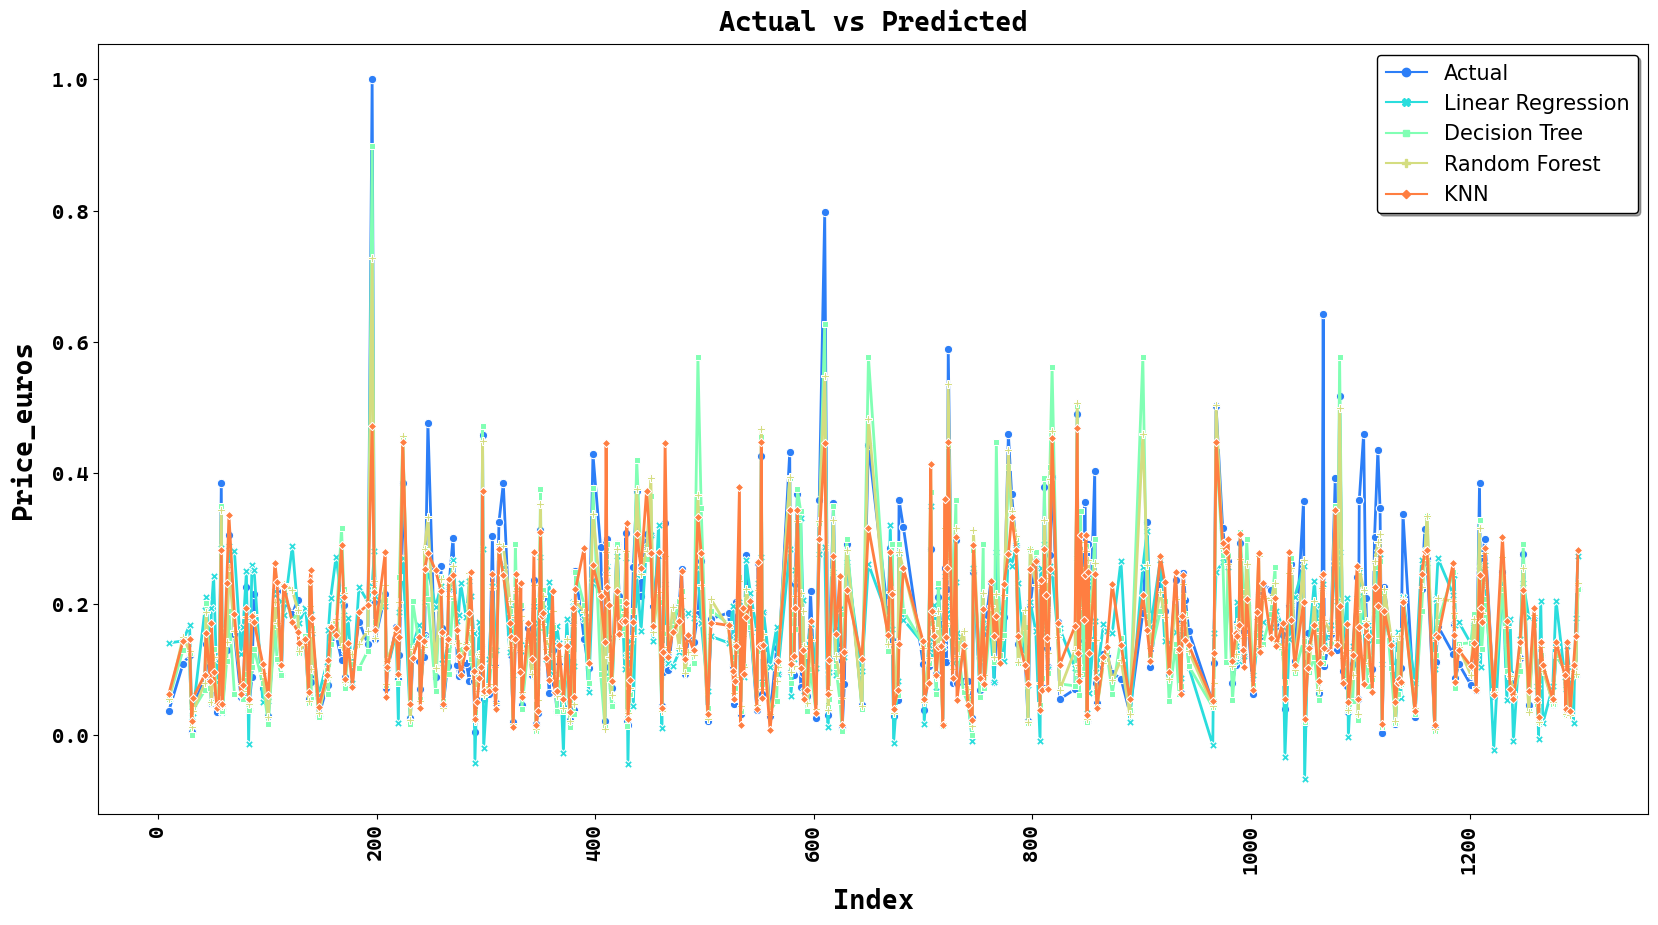

In [54]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = pred_compare, palette = 'rainbow', linewidth = 2.0, dashes = False, markers = True).set_title('Actual vs Predicted', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('Index', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.ylabel('Price_euros', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.xticks(rotation = 90, fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.legend(loc = 'upper right', fontsize = 15, frameon = True, fancybox = True, shadow = True, facecolor = 'white', edgecolor = 'black')
plt.show()

In [55]:
acc_compare = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'KNN Regressor'], 'MSE': [lr_mse, dt_mse, rf_mse, knn_mse], 'MAE': [lr_mae, dt_mae, rf_mae, knn_mae], 'Accuracy': [lr_acc, dt_acc, rf_acc, knn_acc]})
acc_compare

,Model,MSE,MAE,Accuracy
0,Linear Regression,0.008895,0.065071,0.416872
1,Decision Tree Regression,0.005422,0.042536,0.644509
2,Random Forest Regression,0.003048,0.032370,0.800204
3,KNN Regressor,0.005527,0.043568,0.637626


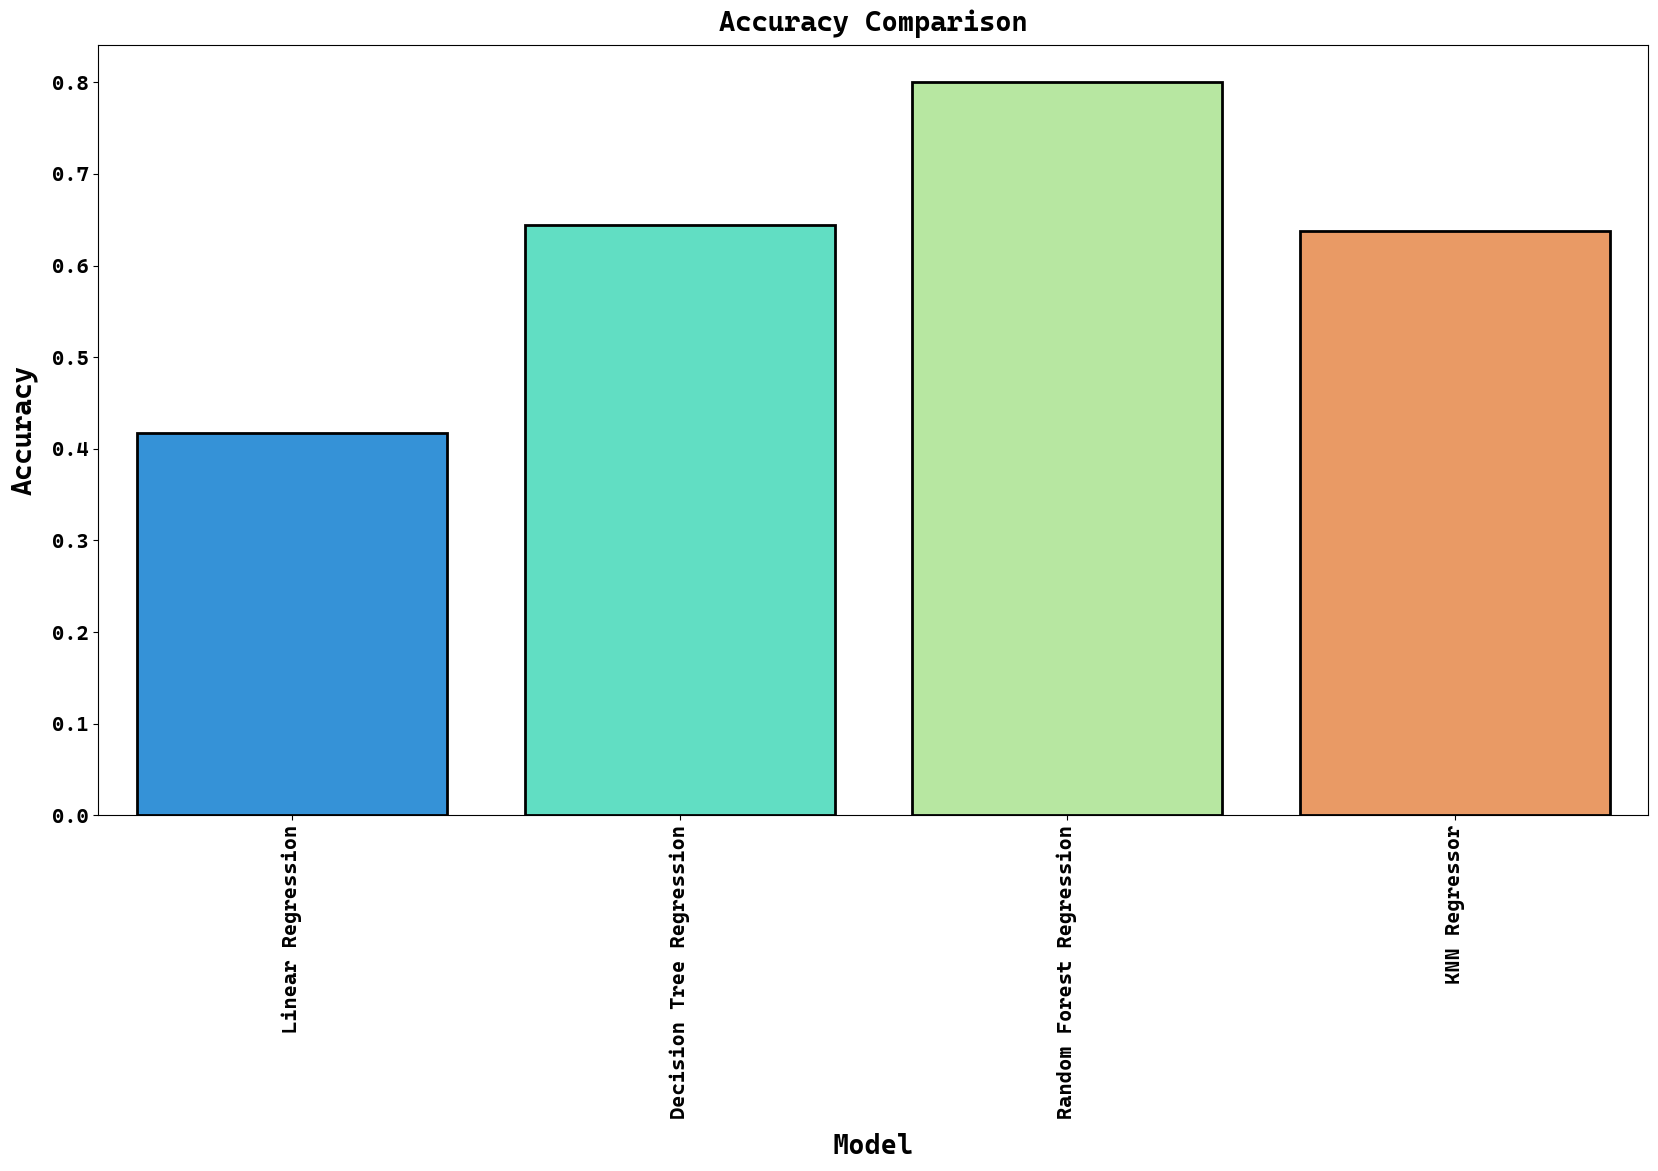

In [56]:
# A figure for the accuracy comparison
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Model', y = 'Accuracy', data = acc_compare, palette = 'rainbow', linewidth = 2.0, edgecolor = 'black').set_title('Accuracy Comparison', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('Model', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.ylabel('Accuracy', fontsize = 20, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black', labelpad = 10.0)
plt.xticks(rotation = 90, fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.yticks(fontsize = 15, fontweight = 'bold', fontname = 'Cascadia Code', color = 'black')
plt.show()

### **`#7.2 Model Selection`**

**After evaluating all the Regression Algorithm's MSE, MAE and Accuracy results. We can say that,** ***`Random Forest Regression`*** **is the best-perfoming Model with** ***`accuracy over 80% consistently`*** **and having the** ***`least amount of MSE and MAE`*** **against other regression models.**